In [6]:
import networkx as nx
import numpy as np
import numpy.random as rnd 
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
%matplotlib inline

In [62]:
class Bass_model:
    def __init__(self, size, net, p, q):
        self.size = size
        self.network = net
        self.p = p
        self.q = q

        # Initialization (all zero)
        for n in self.network.nodes():
            self.network.node[n]['state'] = 0
         
        self.total_adopters = sum(list(self.network.node[n]['state'] == 1 for n in self.network.nodes()))
        
        degree_one = [node for node, deg in nx.degree(self.network) if deg == 1]
        for n in degree_one:
            self.network.node[n]['state'] = 1
            
            
#         self.network.node['107']['state'] = 1
#         self.network.node['1684']['state'] = 1
#         self.network.node['3437']['state'] = 1
#         self.network.node['1912']['state'] = 1
#         self.network.node['1085']['state'] = 1
#         self.network.node['0']['state'] = 1
#         self.network.node['698']['state'] = 1
#         self.network.node['567']['state'] = 1
#         self.network.node['58']['state'] = 1
#         self.network.node['428']['state'] = 1
        
    def asynchronous_step(self):
        # Pick at random one agent, repeat N times
        for i in range(N):
            agent = rnd.choice(self.network.nodes())
            if self.network.node[agent]['state'] == 1:
                continue
            
            # INNOVATION DYNAMICS    
            u1=rnd.uniform(0,1)
            if p > u1:
                # Update status of agent into 1 a.k.a adopted
                self.network.node[agent]['state'] = 1
            
            # SOCIAL DYNAMICS
            k_i = self.network.degree(agent)
            neighbors = [_ for _ in self.network.neighbors(agent)]
            total = 0
            for n in neighbors:
                total += self.network.node[n]['state']

            f_i = total / k_i

            u2 = rnd.uniform(0,1)
            if f_i*q > u2:
                # Update status of agent into 1 a.k.a adopted
                self.network.node[agent]['state'] = 1
        
        self.total_adopters = sum(list(self.network.node[n]['state'] == 1 for n in self.network.nodes()))


System Parameters: p=0.1 q=0.001 
 Time of Full Adoption: 119 
 Number of Adopted Agents: 4096


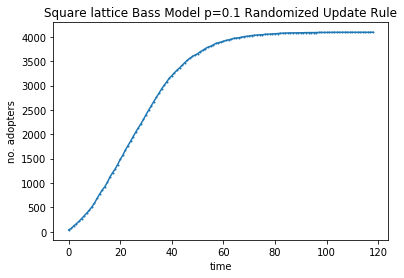

In [48]:
# Defining square lattice network.
L = 64
g = nx.grid_2d_graph(L,L,periodic=True)
g = nx.convert_node_labels_to_integers(g)
N = L*L
p = 0.01
q = 0.1



total_adopters = []
model = Bass_model(N, g, p, q)
time_step = 0
while model.total_adopters < N:    
    time_step += 1
    model.asynchronous_step()
    total_adopters.append(model.total_adopters)
    if model.total_adopters == N:
        print("System Parameters: p=0.1 q=0.001","\n","Time of Full Adoption:", time_step, '\n',"Number of Adopted Agents:",model.total_adopters)
        break
    


plt.figure()
plt.scatter(range(time_step), total_adopters, s=1)
plt.plot(range(time_step), total_adopters)
plt.title("Square lattice Bass Model p=0.1 Randomized Update Rule")
plt.xlabel("time")
plt.ylabel("no. adopters")
plt.show()

System Parameters: p=0.01 q=0.001 
 Time of Full Adoption: 94 
 Number of Adopted Agents: 4039


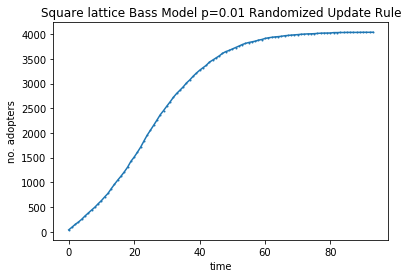

In [49]:
# Defining square lattice network.
L = 64
N = 4039
m = 3
p = 0.01
q = 0.1
g = nx.barabasi_albert_graph(N, m)
g = nx.convert_node_labels_to_integers(g)


total_adopters = []
model = Bass_model(N, g, p, q)
time_step = 0
while model.total_adopters < N:    
    time_step += 1
    model.asynchronous_step()
    total_adopters.append(model.total_adopters)
    if model.total_adopters == N:
        print("System Parameters: p=0.01 q=0.001","\n","Time of Full Adoption:", time_step, '\n',"Number of Adopted Agents:",model.total_adopters)
        break
    


plt.figure()
plt.scatter(range(time_step), total_adopters, s=1)
plt.plot(range(time_step), total_adopters)
plt.title("Barabasi Bass Model p=0.01 Randomized Update Rule")
plt.xlabel("time")
plt.ylabel("no. adopters")
plt.show()

System Parameters: p=0.1 q=0.001 
 Time of Full Adoption: 100 
 Number of Adopted Agents: 4039


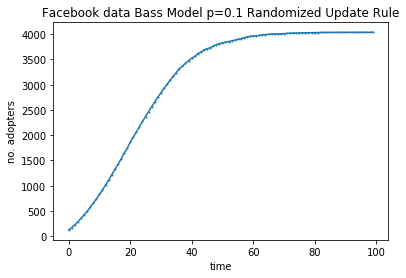

In [63]:
g = nx.read_edgelist("../facebook_combined.txt")
N = len(fb.nodes())
p = 0.01
q = 0.1



total_adopters = []
model = Bass_model(N, g, p, q)
time_step = 0
while model.total_adopters < N:    
    time_step += 1
    model.asynchronous_step()
    total_adopters.append(model.total_adopters)
    if model.total_adopters == N:
        print("System Parameters: p=0.1 q=0.001","\n","Time of Full Adoption:", time_step, '\n',"Number of Adopted Agents:",model.total_adopters)
        break
    


plt.figure()
plt.scatter(range(time_step), total_adopters, s=1)
plt.plot(range(time_step), total_adopters)
plt.title("Facebook data Bass Model p=0.1 Randomized Update Rule")
plt.xlabel("time")
plt.ylabel("no. adopters")
plt.show()

Facebook network
System Parameters: p = 0.1 q = 0.001 
 Time of Full Adoption: 100 
 Number of Adopted Agents: 4039
Lattice network
System Parameters: p = 0.1 q = 0.001 
 Time of Full Adoption: 85 
 Number of Adopted Agents: 4096
Barabasi network
System Parameters: p = 0.1 q = 0.001 
 Time of Full Adoption: 84 
 Number of Adopted Agents: 4039
Erdos network
System Parameters: p = 0.1 q = 0.001 
 Time of Full Adoption: 73 
 Number of Adopted Agents: 4039


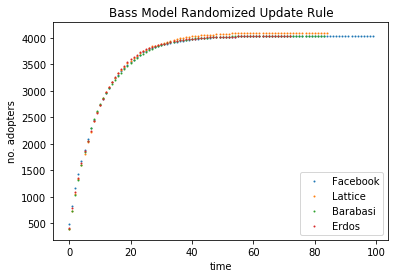

In [64]:
p = 0.1
q = 0.001
networks = []

# Loading facebook data
fb = nx.read_edgelist("../facebook_combined.txt")
networks.append(fb)

# Square lattice
L = 64
N_lattice = L * L
lattice = nx.grid_2d_graph(L, L, periodic=True)
lattice = nx.convert_node_labels_to_integers(lattice)
networks.append(lattice)

N = 4039
m = 3
barabasi = nx.barabasi_albert_graph(N, m)
barabasi = nx.convert_node_labels_to_integers(barabasi)
networks.append(barabasi)

erdos = nx.erdos_renyi_graph(N, 0.01)
erdos = nx.convert_node_labels_to_integers(erdos)
networks.append(erdos)

net_labels = ['Facebook', 'Lattice', 'Barabasi', 'Erdos']
l = 0
for g in networks:
    N = len(g.nodes())
    total_adopters = []
    model = Bass_model(N, g, p, q)
    time_step = 0
    while model.total_adopters < N:    
        time_step += 1
        model.asynchronous_step()
        total_adopters.append(model.total_adopters)
        if model.total_adopters == N:
            print(net_labels[l], "network")
            print("System Parameters: p =", p, "q =", q, "\n","Time of Full Adoption:", time_step, '\n',"Number of Adopted Agents:",model.total_adopters)
            break
    
    plt.scatter(range(time_step), total_adopters, s=1, label = '%s' %net_labels[l])
    l += 1
#plt.plot(range(time_step), total_adopters)
plt.title("Bass Model Randomized Update Rule")
plt.xlabel("time")
plt.ylabel("no. adopters")
plt.legend()
plt.show()

Facebook network
System Parameters: p = 0.01 q = 0.1 
 Time of Full Adoption: 114 
 Number of Adopted Agents: 4039
Lattice network
System Parameters: p = 0.01 q = 0.1 
 Time of Full Adoption: 118 
 Number of Adopted Agents: 4096
Barabasi network
System Parameters: p = 0.01 q = 0.1 
 Time of Full Adoption: 105 
 Number of Adopted Agents: 4039
Erdos network
System Parameters: p = 0.01 q = 0.1 
 Time of Full Adoption: 92 
 Number of Adopted Agents: 4039


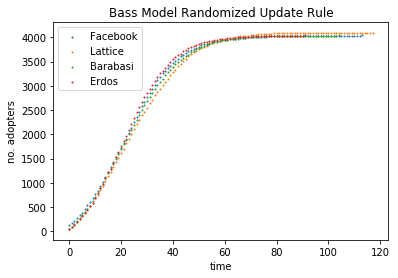

In [65]:
p = 0.01
q = 0.1
networks = []

# Loading facebook data
fb = nx.read_edgelist("../facebook_combined.txt")
networks.append(fb)

# Square lattice
L = 64
N_lattice = L * L
lattice = nx.grid_2d_graph(L, L, periodic=True)
lattice = nx.convert_node_labels_to_integers(lattice)
networks.append(lattice)

N = 4039
m = 3
barabasi = nx.barabasi_albert_graph(N, m)
barabasi = nx.convert_node_labels_to_integers(barabasi)
networks.append(barabasi)

erdos = nx.erdos_renyi_graph(N, 0.01)
erdos = nx.convert_node_labels_to_integers(erdos)
networks.append(erdos)

net_labels = ['Facebook', 'Lattice', 'Barabasi', 'Erdos']
l = 0
for g in networks:
    N = len(g.nodes())
    total_adopters = []
    model = Bass_model(N, g, p, q)
    time_step = 0
    while model.total_adopters < N:    
        time_step += 1
        model.asynchronous_step()
        total_adopters.append(model.total_adopters)
        if model.total_adopters == N:
            print(net_labels[l], "network")
            print("System Parameters: p =", p, "q =", q, "\n","Time of Full Adoption:", time_step, '\n',"Number of Adopted Agents:",model.total_adopters)
            break
    
    plt.scatter(range(time_step), total_adopters, s=1, label = '%s' %net_labels[l])
    l += 1
#plt.plot(range(time_step), total_adopters)
plt.title("Bass Model Randomized Update Rule")
plt.xlabel("time")
plt.ylabel("no. adopters")
plt.legend()
plt.show()

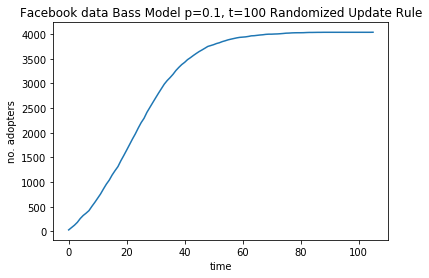

In [52]:
plt.figure()
plt.plot(range(time_step), total_adopters)
#plt.plot(range(time_step), total_adopters)
plt.title("Facebook data Bass Model p=0.1, t=100 Randomized Update Rule")
plt.xlabel("time")
plt.ylabel("no. adopters")
plt.show()

No handles with labels found to put in legend.


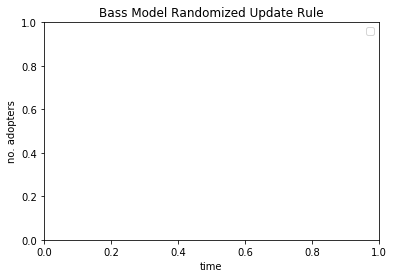

In [55]:
plt.title("Bass Model Randomized Update Rule")
plt.xlabel("time")
plt.ylabel("no. adopters")
plt.legend()
plt.show()